In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# reading the train dataset to a panda dataframe
# the train dataset contains the price column and would be used for training the model
train = pd.read_csv('Housing_dataset_train.csv') 

train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [3]:
# reading the test dataset to a panda dataframe
# the test dataset contains all the features, but no price column(target). The trained model would be used to predict the prices
test = pd.read_csv('Housing_dataset_test.csv')

test

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [4]:
train['ind'] = 1
test['ind'] = 0

# Concatenate the train and test DataFrames
df = pd.concat([train, test])

# Output the combined DataFrame
df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


In [5]:
df.shape

(20000, 8)

In [6]:
# show some useful descriptive statistics for each numerical column
df.describe()

,ID,bedroom,bathroom,parking_space,price,ind
count,20000.000000,18201.000000,18195.000000,18189.000000,1.400000e+04,20000.000000
mean,4849.500000,4.315312,3.124815,3.157458,2.138082e+06,0.700000
std,3822.507531,2.445600,2.035028,1.601164,1.083057e+06,0.458269
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05,0.000000
25%,1666.000000,2.000000,1.000000,2.000000,1.393990e+06,0.000000
50%,3499.500000,4.000000,2.000000,3.000000,1.895223e+06,1.000000
75%,7999.250000,6.000000,5.000000,4.000000,2.586699e+06,1.000000
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07,1.000000


In [7]:
# show a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             20000 non-null  int64  
 1   loc            18187 non-null  object 
 2   title          18278 non-null  object 
 3   bedroom        18201 non-null  float64
 4   bathroom       18195 non-null  float64
 5   parking_space  18189 non-null  float64
 6   price          14000 non-null  float64
 7   ind            20000 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


> Except the ID and price columns, the other columns contain missing values which would be investiagted further. 

In [8]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nNumber of Duplicate Rows:", len(duplicate_rows))


Number of Duplicate Rows: 0


In [9]:
# check the count of null values for each column
null_counts = df.isnull().sum()
null_counts

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price            6000
ind                 0
dtype: int64

In [10]:
# Calculate the total number of missing values in each column
missing_counts = df.isnull().sum()

# Calculate the total number of rows in the dataset
total_rows = len(df)

# Calculate the percentage of missing values for each column
missing_percentage = (missing_counts / total_rows) * 100

# Create a DataFrame to display the results
missing_data_info = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing Percentage': missing_percentage.values
})

# Sort the DataFrame by the missing percentage in descending order
missing_data_info = missing_data_info.sort_values(by='Missing Percentage', ascending=False)

# Display the result
print(missing_data_info)

          Column  Missing Count  Missing Percentage
6          price           6000              30.000
1            loc           1813               9.065
5  parking_space           1811               9.055
4       bathroom           1805               9.025
3        bedroom           1799               8.995
2          title           1722               8.610
0             ID              0               0.000
7            ind              0               0.000


> The missing/null values while not a large proportion, is still significant enough to impact analysis or modeling if not handled properly. Therefore, the missing values will be Imputted with the median/mode of the respective columns.

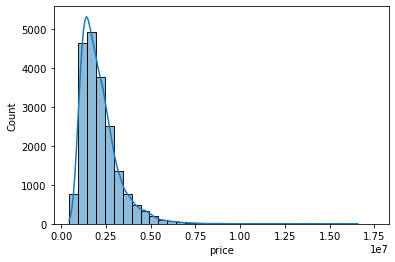

In [11]:
base_color = sns.color_palette()[0]

# make a histogram plot of the price
bins = np.arange(df['price'].min(), df['price'].max() + 1000000, 500000)
sns.histplot(data = df, x='price', bins= bins, color = base_color, kde = True);

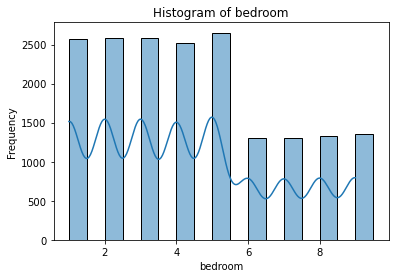

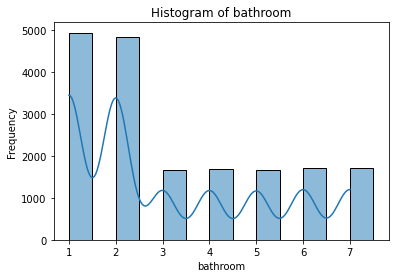

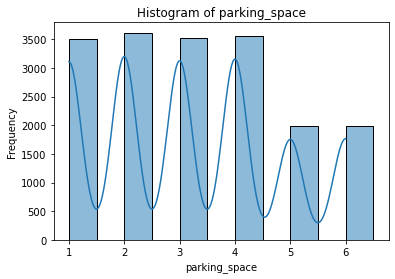

In [12]:
# make a histogram of the remaining numerical features
# write a function for the histogram plot
def plot_histogram (data, column_name):
    bins = np.arange(data[column_name].min(), data[column_name].max() + 1, 0.5)
    sns.histplot(data[column_name], bins=bins, edgecolor='black', color = base_color, kde = True)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.show()

# apply the function to the respective columns
numerical_features = ['bedroom','bathroom','parking_space']
for column_name in numerical_features:
     plot_histogram(df, column_name)

> The distribution of the numerical columns (price, bedroom, bathroom, and parking space) appear to be right-skewed with majority of the data points lying to the left of the plots. 

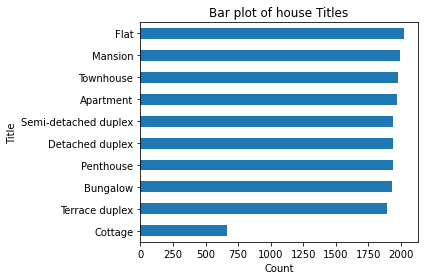

In [13]:
# make a bar plot of the title column
title_counts = df['title'].value_counts(ascending = True)

title_counts.plot(kind='barh', color= base_color)
plt.xlabel('Count')
plt.ylabel('Title')
plt.title('Bar plot of house Titles')
plt.tight_layout()
plt.show()

> The most popular building apprear to be the flat, while the cottage is the least popular offered by the real estate company. Other house styles are also very popular.

In [14]:
# show the unique values in the location column
df['loc'].unique()

array(['Katsina', 'Ondo', 'Ekiti', 'Anambra', 'Kogi', 'Borno', 'Kwara',
       'Osun', 'Kaduna', 'Ogun', 'Bayelsa', nan, 'Abia', 'Rivers',
       'Taraba', 'Ebonyi', 'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Delta',
       'Kano', 'Yobe', 'Benue', 'Bauchi', 'Cross River', 'Niger',
       'Adamawa', 'Plateau', 'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa',
       'Gombe', 'Akwa Ibom', 'Lagos'], dtype=object)

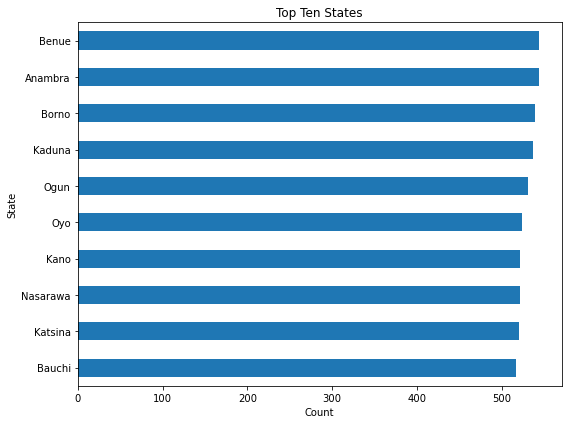

In [15]:
# Count the occurrences of each state in the 'location' column
state_counts = df['loc'].value_counts()

# Select the top ten states
top_ten_states = state_counts.head(10)

# Sort the top ten states in descending order
top_ten_states = top_ten_states.sort_values(ascending=True)

# Plot the top ten states on a bar chart
plt.figure(figsize=(8, 6))
top_ten_states.plot(kind='barh', color= base_color)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Top Ten States')
plt.tight_layout()
plt.show()

> Kaduna leads the states followed closely by Anambra and then Borno State.

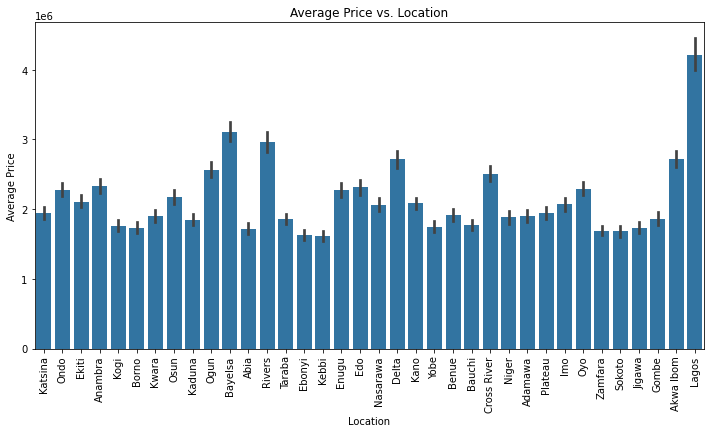

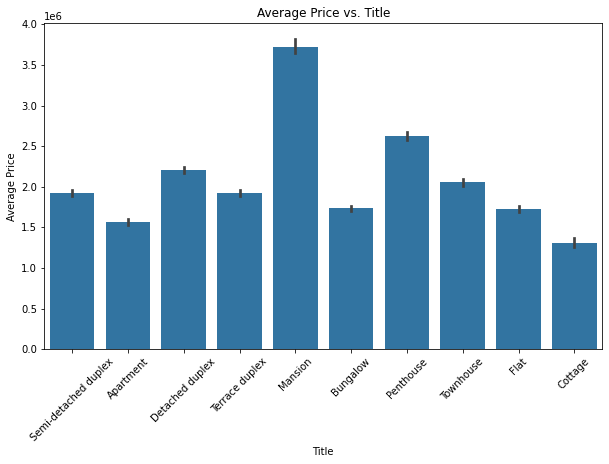

In [16]:
# Relationship between 'loc' and 'price'
plt.figure(figsize=(12, 6))
sns.barplot(x='loc', y='price', data= df, color = base_color)
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Average Price vs. Location')
plt.xticks(rotation=90)
plt.show()

# Relationship between 'title' and 'price'
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='price', data= df, color = base_color)
plt.xlabel('Title')
plt.ylabel('Average Price')
plt.title('Average Price vs. Title')
plt.xticks(rotation=45)
plt.show()

> Price of houses are highest in Lagos state. Other states with relative high cost of houses include; Bayelsa, Rivers, Delta, Cross River and AkwaIbom. The mansion is the most expensive building followed by the Penthouse and then the Detached Duplex. 

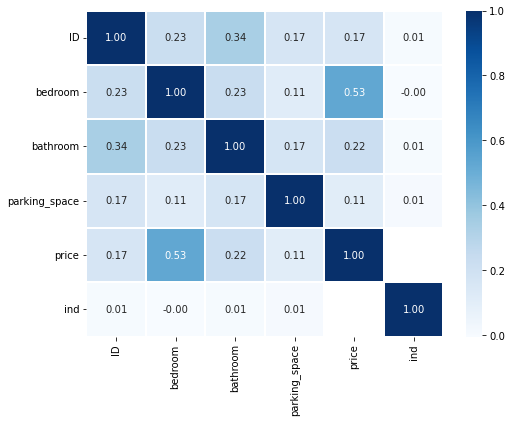

In [17]:
# to see the correlation among all the variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),
            cmap = 'Blues',
            fmt = '.2f',
            linewidths = 2,
            annot = True);

> The number of bedrooms is moderately positively correlated to price with a correlation of 0.53. Other factors have minimal correlation with each other.